In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2 
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [4]:
breast_img = glob.glob('C:/Users/Asif Nazir/Desktop/DL Project/breast histopathological/**/*.png', recursive = True)


In [5]:
breast_img

['C:/Users/Asif Nazir/Desktop/DL Project/breast histopathological\\10253\\0\\10253_idx5_x1001_y1001_class0.png',
 'C:/Users/Asif Nazir/Desktop/DL Project/breast histopathological\\10253\\0\\10253_idx5_x1001_y1051_class0.png',
 'C:/Users/Asif Nazir/Desktop/DL Project/breast histopathological\\10253\\0\\10253_idx5_x1001_y1101_class0.png',
 'C:/Users/Asif Nazir/Desktop/DL Project/breast histopathological\\10253\\0\\10253_idx5_x1001_y1151_class0.png',
 'C:/Users/Asif Nazir/Desktop/DL Project/breast histopathological\\10253\\0\\10253_idx5_x1001_y1201_class0.png',
 'C:/Users/Asif Nazir/Desktop/DL Project/breast histopathological\\10253\\0\\10253_idx5_x1001_y1251_class0.png',
 'C:/Users/Asif Nazir/Desktop/DL Project/breast histopathological\\10253\\0\\10253_idx5_x1001_y1301_class0.png',
 'C:/Users/Asif Nazir/Desktop/DL Project/breast histopathological\\10253\\0\\10253_idx5_x1001_y1351_class0.png',
 'C:/Users/Asif Nazir/Desktop/DL Project/breast histopathological\\10253\\0\\10253_idx5_x1001_y1

In [6]:
for imgname in breast_img[:3]:
    print(imgname)

C:/Users/Asif Nazir/Desktop/DL Project/breast histopathological\10253\0\10253_idx5_x1001_y1001_class0.png
C:/Users/Asif Nazir/Desktop/DL Project/breast histopathological\10253\0\10253_idx5_x1001_y1051_class0.png
C:/Users/Asif Nazir/Desktop/DL Project/breast histopathological\10253\0\10253_idx5_x1001_y1101_class0.png


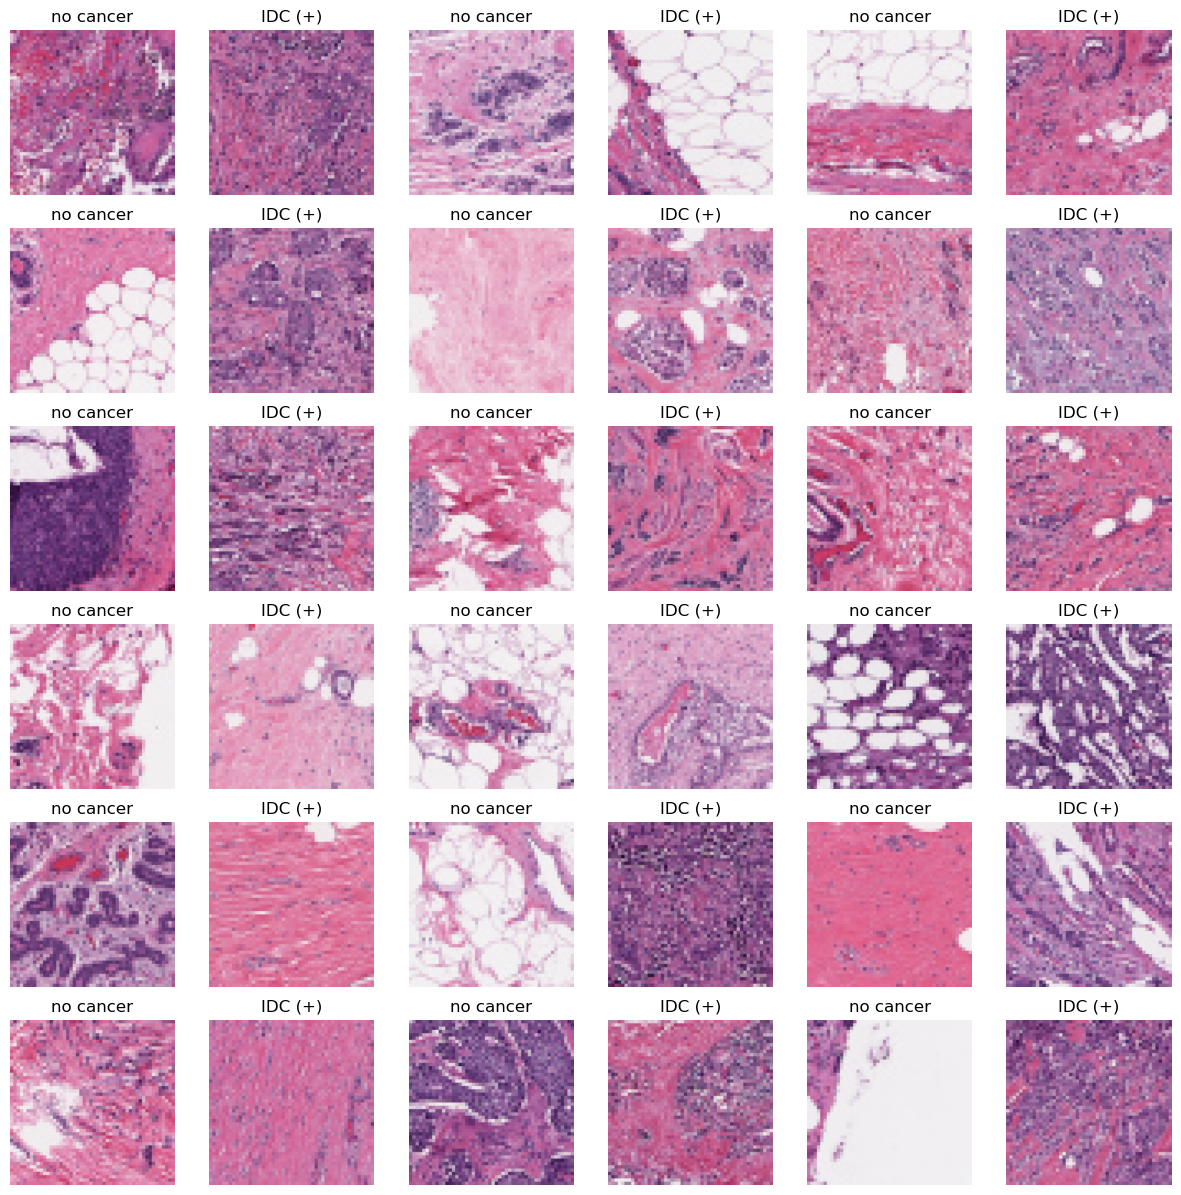

In [7]:
N_IDC = []
P_IDC = []

for img in breast_img:
    if img[-5] == '0' :
        N_IDC.append(img)
    
    elif img[-5] == '1' :
        P_IDC.append(img)
plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(N_IDC), 18)
some_can = np.random.randint(0, len(P_IDC), 18)

s = 0
for num in some_non:
    
        img = image.load_img((N_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
s = 1
for num in some_can:
    
        img = image.load_img((P_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('IDC (+)')
        plt.imshow(img.astype('uint8'))
        s += 1

In [8]:
non_img_arr = []
can_img_arr = []

for img in N_IDC:
        
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])
    
for img in P_IDC:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])


In [9]:
X = []
y = []

breast_img_arr = np.concatenate((non_img_arr, can_img_arr))
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [10]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X,y)

Total number of images: 51784
Number of IDC(-) Images: 50005
Number of IDC(+) Images: 1779
Image shape (Width, Height, Channels): (50, 50, 3)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (36248, 50, 50, 3)
Testing Data Shape: (15536, 50, 50, 3)


In [12]:
# Reduce Sample Size for allocating memory Problems in kaggle 

X_train = X_train[0:50000] 
Y_train = Y_train[0:50000] 
X_test = X_test[0:30000] 
Y_test = Y_test[0:30000] 

In [13]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import itertools

In [14]:
early_stop=EarlyStopping(monitor='val_loss',patience=5)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 50, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(24, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

In [15]:
model.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 25, 25, 32)       128       
 hNormalization)                                                 
                                                        

In [17]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 20, batch_size = 40)

Epoch 1/20
907/907 [==============================] - 525s 569ms/step - loss: 0.3264 - accuracy: 0.8689 - val_loss: 0.1210 - val_accuracy: 0.9635
Epoch 2/20
907/907 [==============================] - 509s 561ms/step - loss: 0.1161 - accuracy: 0.9659 - val_loss: 0.1088 - val_accuracy: 0.9635
Epoch 3/20
907/907 [==============================] - 499s 550ms/step - loss: 0.1083 - accuracy: 0.9661 - val_loss: 0.1340 - val_accuracy: 0.9634
Epoch 4/20
907/907 [==============================] - 473s 522ms/step - loss: 0.1054 - accuracy: 0.9663 - val_loss: 0.1145 - val_accuracy: 0.9635
Epoch 5/20
907/907 [==============================] - 497s 548ms/step - loss: 0.1015 - accuracy: 0.9663 - val_loss: 0.1123 - val_accuracy: 0.9635
Epoch 6/20
907/907 [==============================] - 457s 504ms/step - loss: 0.0991 - accuracy: 0.9669 - val_loss: 0.1199 - val_accuracy: 0.9632
Epoch 7/20
907/907 [==============================] - 458s 505ms/step - loss: 0.0950 - accuracy: 0.9668 - val_loss: 0.1157 -

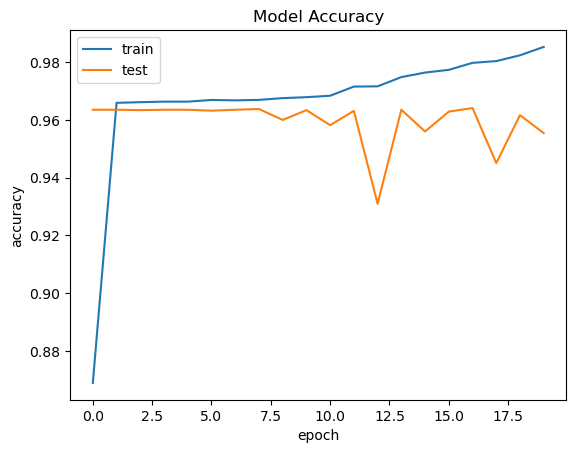

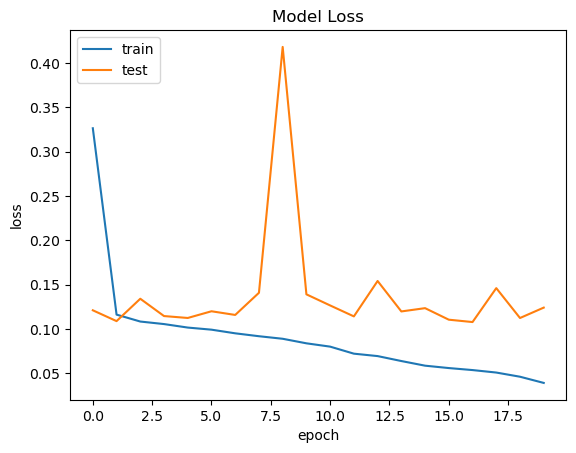

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

486/486 [==============================] - 43s 87ms/step


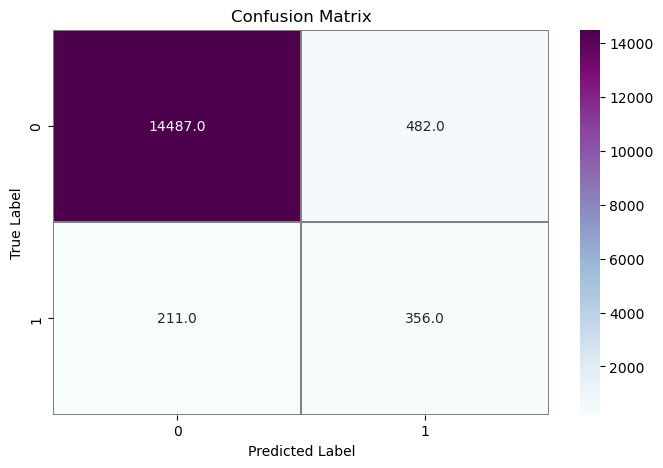

In [19]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1) 
#accuracy=accuracy_score(y_true=Y_true, y_pred=Y_pred)
#print(accuracy)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

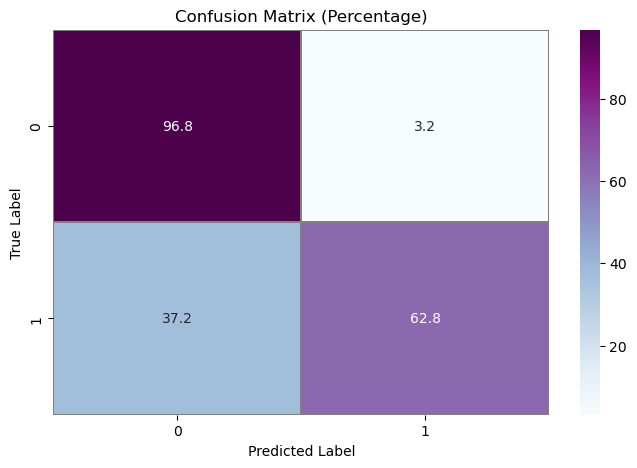

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
#Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1) 
Y_true = np.argmax(Y_test, axis=1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

# calculate the percentage
confusion_mtx_percent = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis] * 100

f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_mtx_percent, annot=True, linewidths=0.01, cmap="BuPu", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Percentage)")
plt.show()

In [21]:
model.evaluate(X_test,Y_test)

486/486 [==============================] - 42s 86ms/step - loss: 0.1240 - accuracy: 0.9554


[0.12399765104055405, 0.95539391040802]

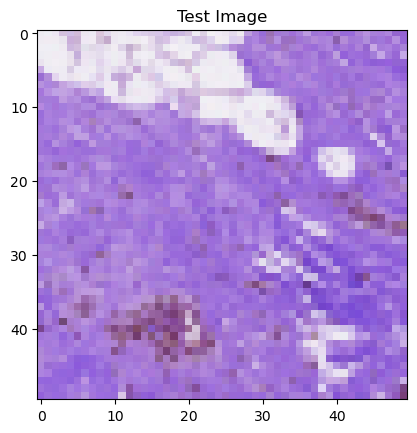

In [22]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])
    
index = 90
img_plot(X_test, index)


In [23]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])
index = 100
input = X_test[index:index+1]
pred = model.predict(input)[0].argmax()
label = Y_test[index].argmax()
print('Predicted Value using  cnn model',pred)
print("True Value",label)

1/1 [==============================] - 0s 36ms/step
Predicted Value using  cnn model 0
True Value 0
